Reading image: ./grayscale_dataset/klinklang.png
Reading target: ./mf_dataset/klinklang.png
Reading image: ./grayscale_dataset/palpitoad.png
Reading target: ./mf_dataset/palpitoad.png
Reading image: ./grayscale_dataset/electrode.png
Reading target: ./mf_dataset/electrode.png
Reading image: ./grayscale_dataset/varoom.png
Reading target: ./mf_dataset/varoom.png


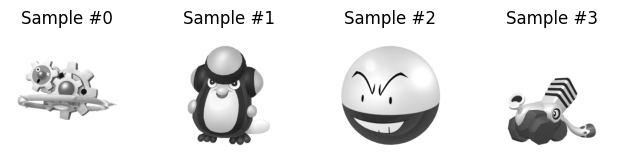

In [2]:
import os
from skimage import io, transform

# import matplotlib
# matplotlib.use("TkAgg")  # Or "Qt5Agg"
# print(matplotlib.get_backend())

# import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# from torchvision import transforms, utils
# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

plt.ion()  # interactive mode


# root_dir = "./mf_dataset"
grey_dir = "./grayscale_dataset"
mf_dir = "./mf_dataset"
noisy_dir = "./noisy_dataset"
mf_file_names = os.listdir("./grayscale_dataset")


class MyDataset(Dataset):
    def __init__(self, original_dir, mf_file_names, target_dir, transform=None):
        self.original_dir = original_dir
        self.mf_file_names = mf_file_names
        self.target_dir = target_dir
        self.transform = transform

    def __len__(self):
        return len(self.mf_file_names)

    def __getitem__(self, idx):
        img_name = os.path.join(self.original_dir, self.mf_file_names[idx])
        target_name = os.path.join(self.target_dir, self.mf_file_names[idx])
        print(f"Reading image: {img_name}")
        print(f"Reading target: {target_name}")
        # image = Image.open(img_name)

        image = io.imread(img_name)
        target = io.imread(target_name)
        sample = {"image": image, "target": target}

        return sample


poke_ds = MyDataset(
    original_dir=grey_dir, target_dir=mf_dir, mf_file_names=mf_file_names
)


fig = plt.figure()

for i, sample in enumerate(poke_ds):

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title("Sample #{}".format(i))
    ax.axis("off")
    # show_landmarks(**sample)
    
    # ax.imshow(sample["image"], cmap="gray")
    ax.imshow(sample["target"], cmap="gray")

    if i == 3:
        plt.show()
        break

